In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ip_map = {
    "45.77.229.242": "GB-London",
    "62.154.179.86": "DE-Berlin",
    "194.156.155.241": "ES-Madrid",
    "194.230.35.117": "CH-Zurich",
    # "193.46.104.17": "AT-Vienna", #should be .17 but error
    "193.46.104.12": "AT-Vienna",
    "185.32.189.249": "PT-Lisbon",
    "213.135.49.134": "PL-Warsaw",
    "51.159.68.135": "FR-Paris",
    "185.78.84.3": "TR-Istanbul",
    "185.157.208.248": "GR-Athens"
}

In [4]:
ping_df = pd.read_csv("data/full/ping.csv")

ping_df['src'] = ping_df['src_addr'].map(ip_map)
ping_df['dst'] = ping_df['dst_addr'].map(ip_map)

ping_df['timestamp'] = pd.to_datetime(ping_df['timestamp'], unit='s')
ping_df = ping_df.sort_values('timestamp')

ping_df['pair'] = ping_df['src'] + " - " + ping_df['dst']

In [5]:
http_df = pd.read_csv("data/full/http.csv")

http_df['src'] = http_df['src_addr'].map(ip_map)
http_df['dst'] = http_df['dst_addr'].map(ip_map)

http_df['timestamp'] = pd.to_datetime(http_df['timestamp'], unit='s')
http_df = http_df.sort_values('timestamp')

http_df['pair'] = http_df['src'] + " - " + http_df['dst']

In [6]:
trace_df = pd.read_csv("data/full/traceroute.csv")

trace_df['src'] = trace_df['src_addr'].map(ip_map)
trace_df['dst'] = trace_df['dst_addr'].map(ip_map)

trace_df['timestamp'] = pd.to_datetime(trace_df['timestamp'], unit='s')
trace_df = trace_df.sort_values('timestamp')

trace_df['pair'] = trace_df['src'] + " - " + trace_df['dst']

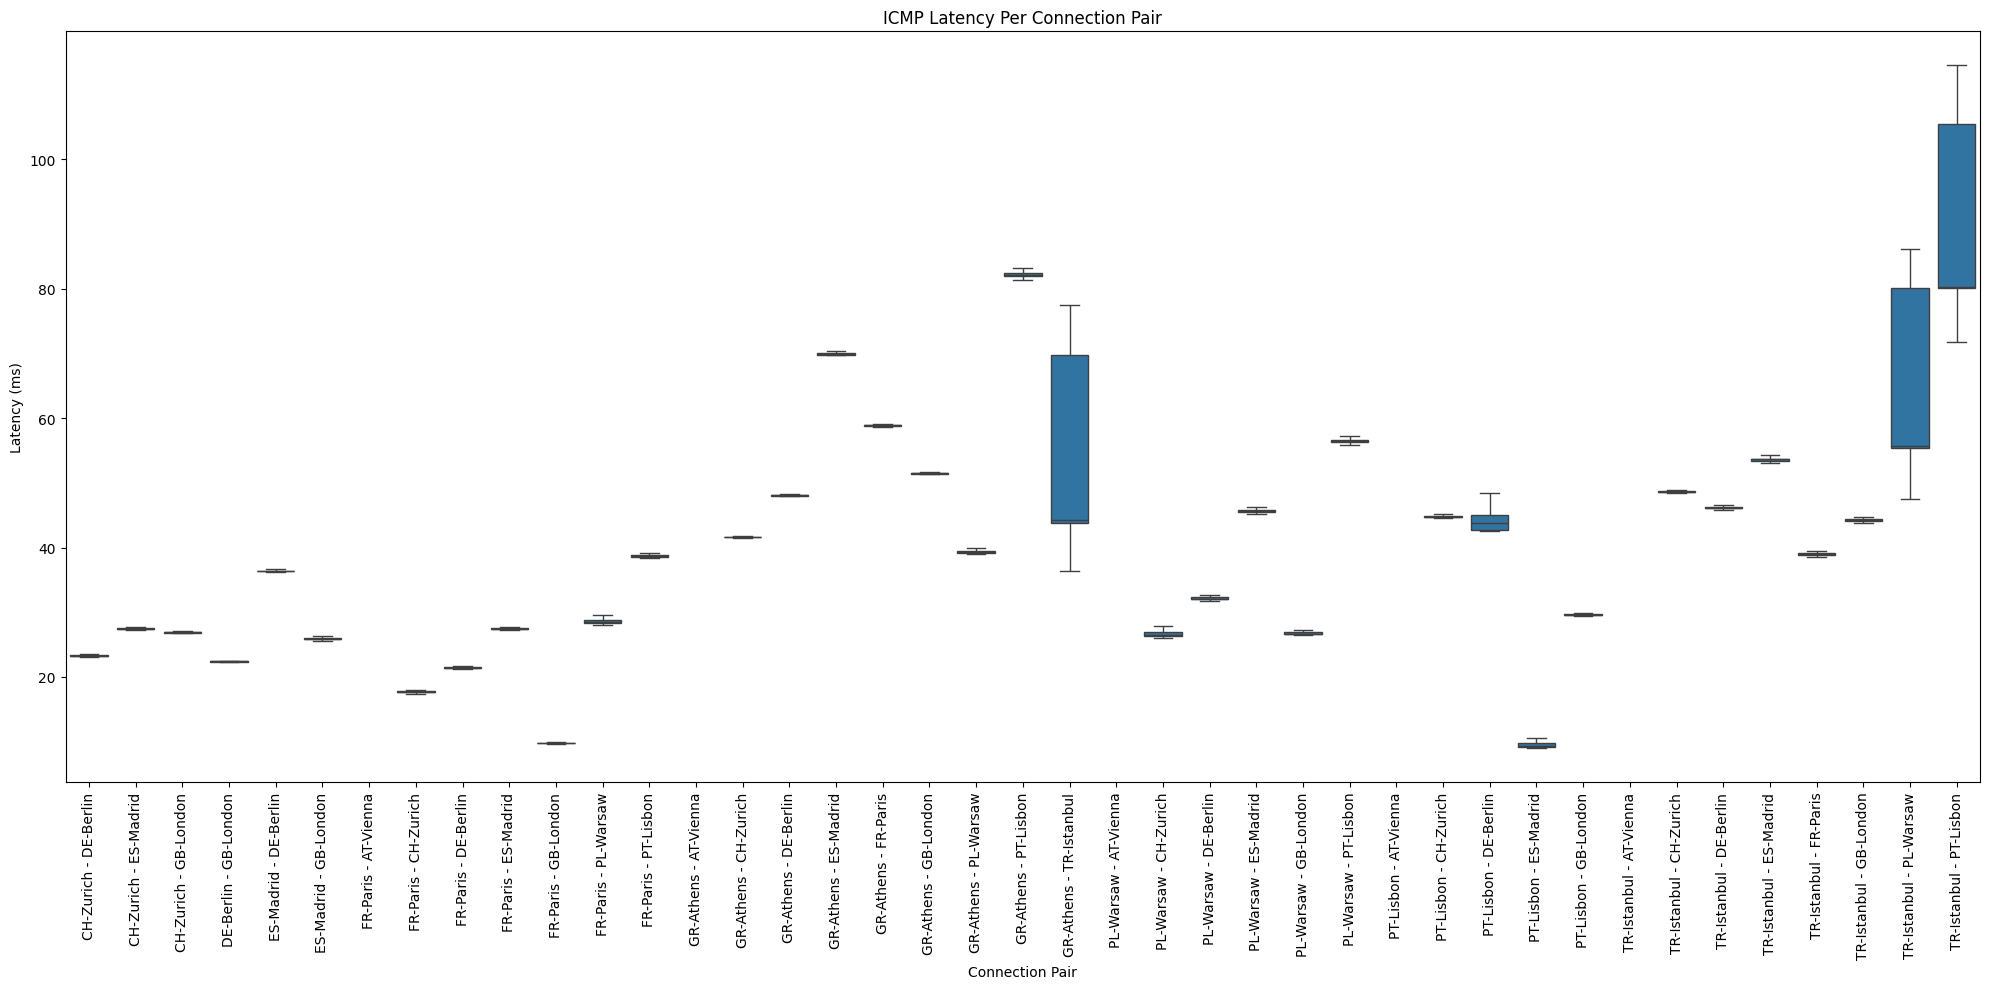

In [7]:
box_ping_data = ping_df.groupby('pair')['avg'].apply(list).apply(lambda lst: [x for x in lst if x >= 0]) 

box_ping_data = box_ping_data.explode().reset_index()
box_ping_data.columns = ["pair", "avg"]

plt.figure(figsize=(20,10)) 
sns.boxplot(data=box_ping_data, x="pair", y="avg", showfliers=False)
plt.xticks(rotation=90) 
plt.xlabel("Connection Pair")
plt.ylabel("Latency (ms)")
plt.title("ICMP Latency Per Connection Pair")
plt.tight_layout() 
plt.show()

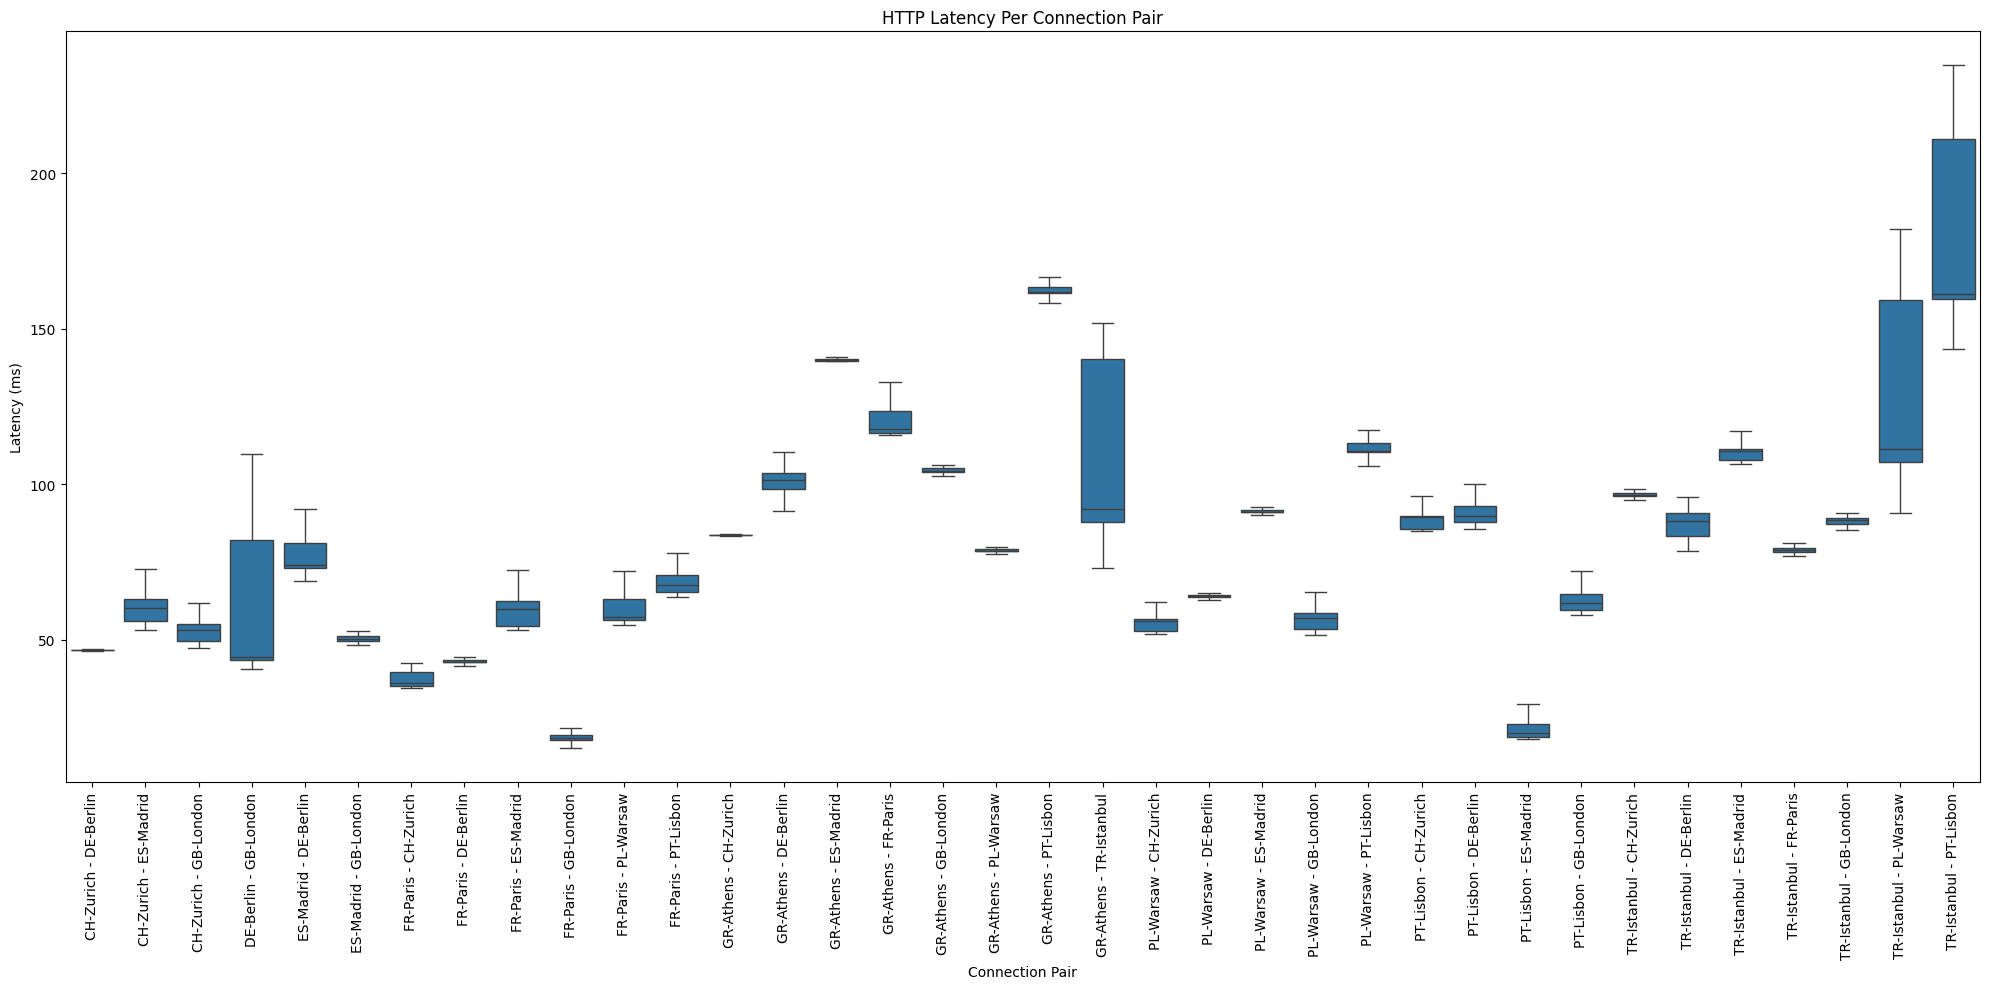

In [8]:
box_http_data = http_df.groupby('pair')['rt'].apply(list)

box_http_data = box_http_data.apply(lambda lst: [x for x in lst if x > 0]) 

box_http_data = box_http_data.explode().reset_index()
box_http_data.columns = ["pair", "rt"]

plt.figure(figsize=(20,10)) 
sns.boxplot(data=box_http_data, x="pair", y="rt", showfliers=False)
plt.xticks(rotation=90) 
plt.xlabel("Connection Pair")
plt.ylabel("Latency (ms)")
plt.title("HTTP Latency Per Connection Pair")
plt.tight_layout() 
plt.show()

In [9]:
final_hops = (
    trace_df.sort_values('hop')
            .groupby(['src_addr', 'dst_addr', 'timestamp'])
            .tail(1)
)
print(final_hops)

           msm_id         src_addr         dst_addr  hop  sent  received  \
65311   136909080   185.32.189.249  194.156.155.241    4     3         3   
58815   136909080   185.32.189.249  194.156.155.241    4     3         3   
78527   136909080   185.32.189.249  194.156.155.241    4     3         3   
71625   136909080   185.32.189.249  194.156.155.241    4     3         3   
55625   136909080   185.32.189.249  194.156.155.241    4     3         3   
...           ...              ...              ...  ...   ...       ...   
103402  136909078      185.78.84.3   194.230.35.117  255     3         0   
17099   136909083      185.78.84.3    62.154.179.86  255     3         0   
327254  136909065      185.78.84.3    51.159.68.135  255     3         0   
316191  136909066      185.78.84.3   185.32.189.249  255     3         0   
173709  136909069  185.157.208.248    193.46.104.12  255     3         0   

           min         avg      max             from  timed_out  \
65311    9.199   10.

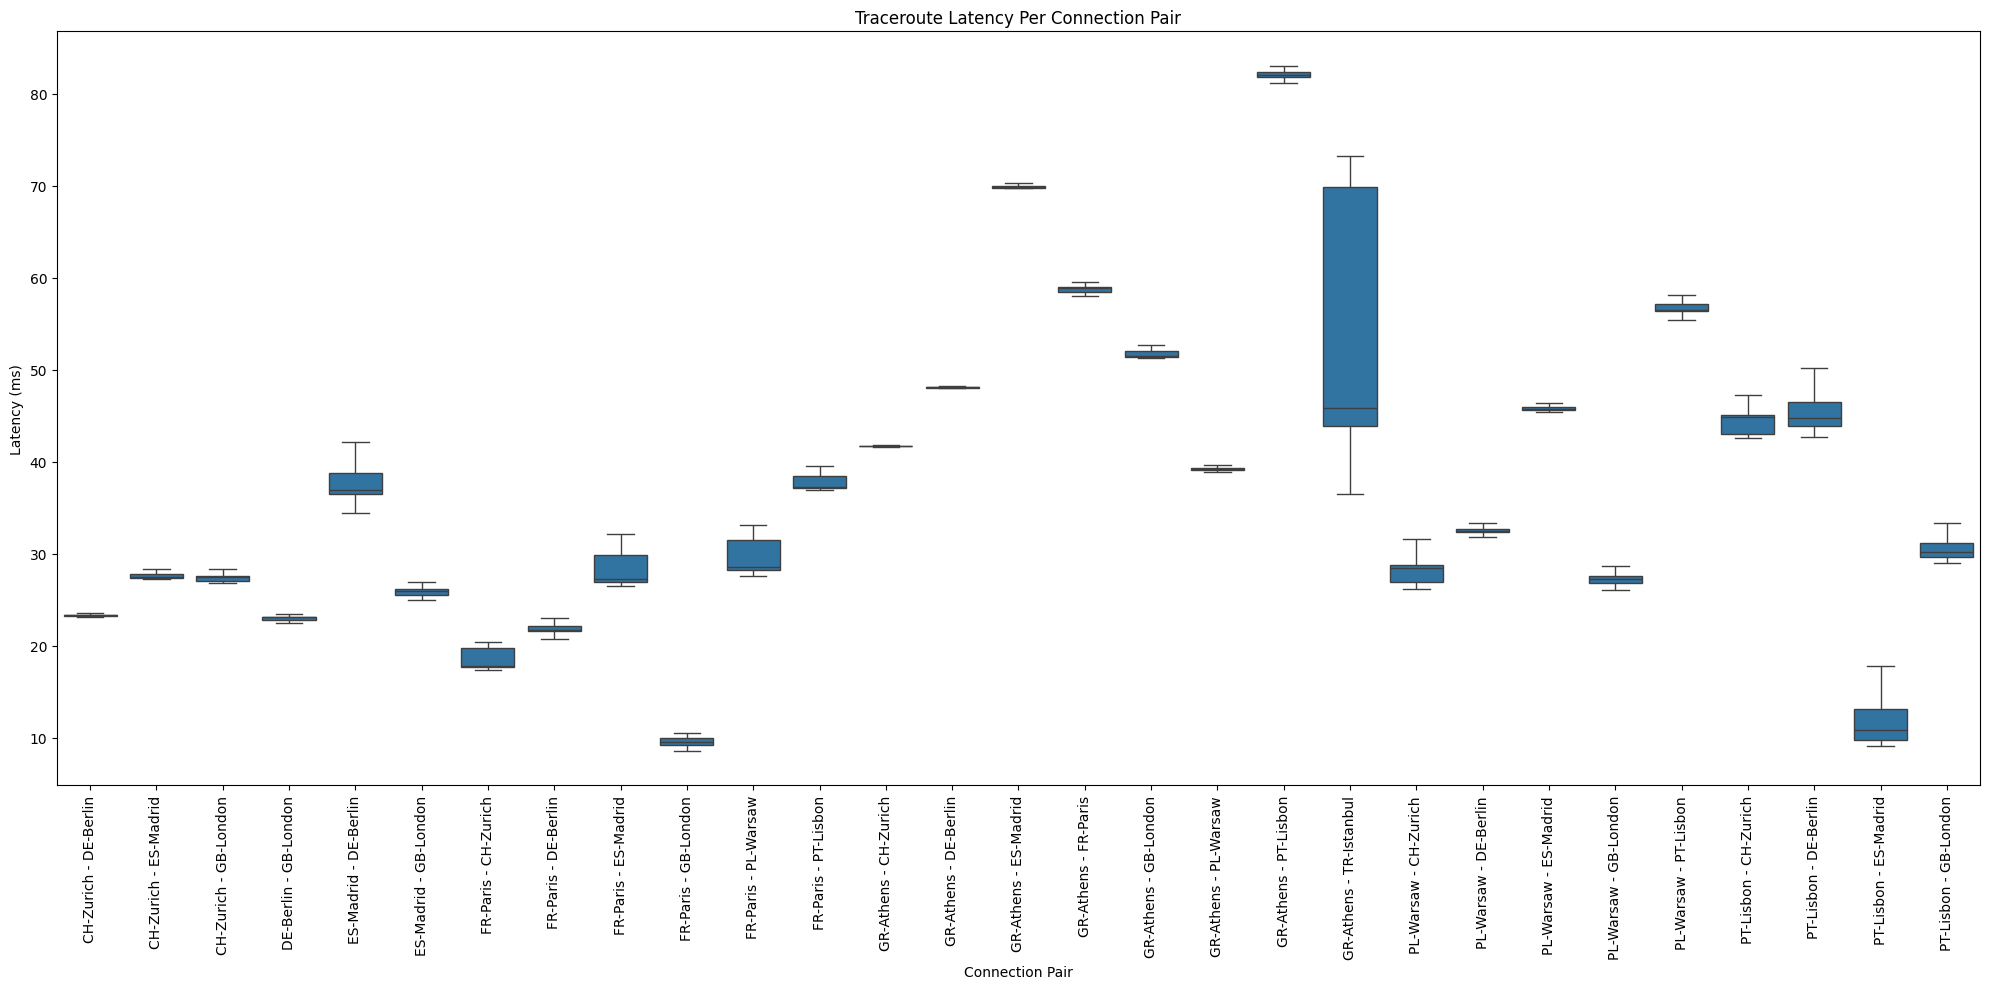

In [10]:
box_trace_data = final_hops.groupby('pair')['avg'].apply(list)

box_trace_data = box_trace_data.apply(
    lambda lst: [x for x in lst if x > 0.0]
)

box_trace_data = box_trace_data[box_trace_data.apply(len) > 0]

box_trace_data = box_trace_data.explode().reset_index()
box_trace_data.columns = ["pair", "avg"]

plt.figure(figsize=(20,10)) 
sns.boxplot(data=box_trace_data, x="pair", y="avg", showfliers=False)
plt.xticks(rotation=90) 
plt.xlabel("Connection Pair")
plt.ylabel("Latency (ms)")
plt.title("Traceroute Latency Per Connection Pair")
plt.tight_layout() 
plt.show()